# **Tutorial 6**


In [1]:
import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import xarray as xr #multidimensional dataframes
import pymc as pm
import arviz as az
import seaborn as sns
import math

#preliz
!pip install preliz
import preliz as pz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 6.3 MB/s eta 0:00:00


### **Grid Method**

Defining the function

In [2]:
def posterior_grid(grid, data):
    """
    A grid implementation for the the number of emails
    """
    grid_points = len(grid)
    prior = pz.Gamma(alpha = 1.68, beta = 0.171).pdf(grid)

    for ii, i in enumerate(data):
      if ii == 0:
        likelihood = pz.Poisson(mu = grid).pdf(i)
      else:
        likelihood = likelihood*pz.Poisson(mu = grid).pdf(i)

    posterior = likelihood * prior
    posterior /= posterior.sum() * ((np.max(grid) - np.min(grid))/grid_points)
    return grid, posterior

Function call

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

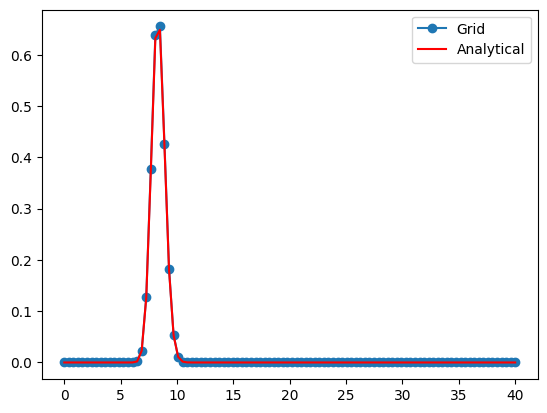

In [3]:
grid = np.linspace(0, 40, 100) #the evaluation points

data = np.random.poisson(8, 24)

grid, posterior = posterior_grid(grid, data)

plt.plot(grid, posterior, 'o-', label = 'Grid')
n = len(data)
S = np.sum(data)

posterior2 = pz.Gamma(1.68 + S, 0.171 + n).pdf(grid)

plt.plot(grid, posterior2, 'red', label = 'Analytical')

plt.legend(loc = 'upper right')

plt.savefig("100.png", bbox_inches='tight')
files.download("100.png")

### **Metropolis Hastings**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

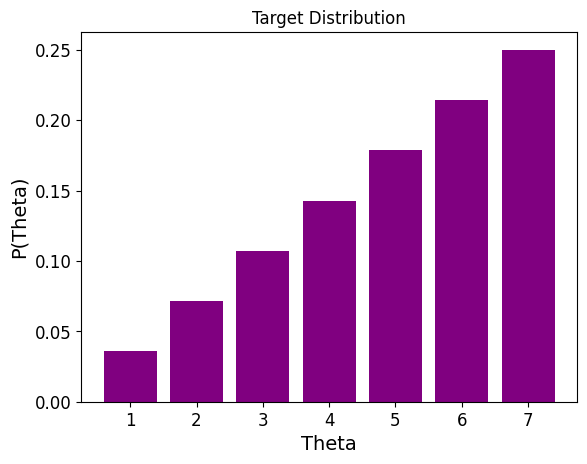

In [37]:
#target distribution
states = np.arange(1, 8)
target_dist = states / np.sum(states)  # This is the target distribution p(x) = x/sum(x)

plt.bar(states, target_dist, color='purple')
plt.title('Target Distribution')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)

plt.savefig("target.png", bbox_inches='tight')
files.download("target.png")

In [45]:
#t=0
#start at island 3
visited = np.zeros((7))
visited[2] = visited[2] + 1

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 0', fontsize = 14)

plt.savefig("t0.png", bbox_inches='tight')
files.download("t0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

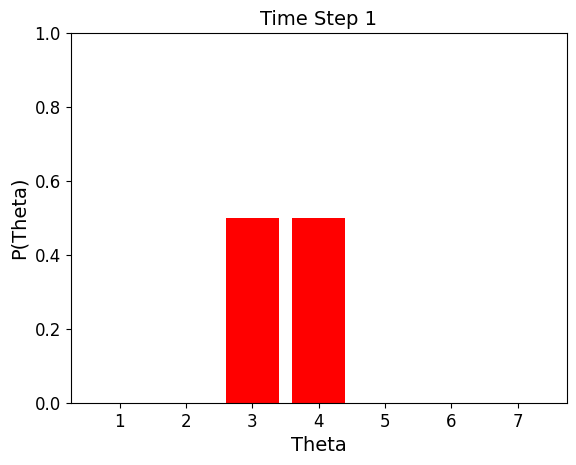

In [46]:
#t=1
#try and move to 4
visited[3] = visited[3] + 1

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 1', fontsize = 14)
plt.ylim([0, 1])

plt.savefig("t1.png", bbox_inches='tight')
files.download("t1.png")

In [51]:
#t=2
#try and move to 3
move = 0.75 > np.random.rand()
if move:
  visited[2] = visited[2] + 1 #go to state 3
else:
  visited[3] = visited[3] + 1 #stay in 4

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 2', fontsize = 14)
plt.ylim([0, 1])

plt.savefig("t2.png", bbox_inches='tight')
files.download("t2.png")

0.5131852385499448

The whole process

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

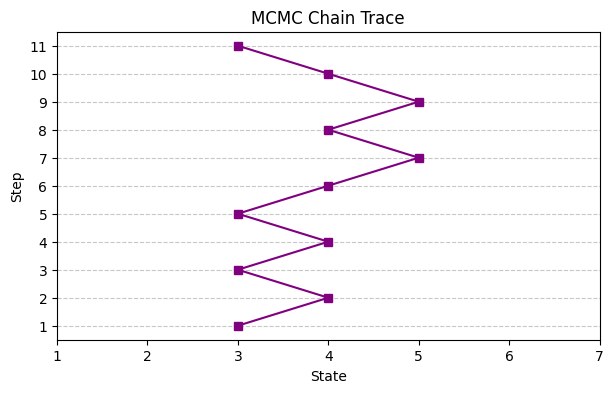

In [103]:
#The chain part
states = np.arange(1, 8)
p = states / np.sum(states)

chain = [3]
num_steps = 10

for _ in range(num_steps):
    current = chain[-1]
    proposal = current + np.random.choice([-1, 1])
    if proposal < 1 or proposal > 7:
        proposal = current
    accept_prob = min(1, p[proposal - 1] / p[current - 1])
    if np.random.rand() < accept_prob:
        chain.append(proposal)
    else:
        chain.append(current)

# Plotting
plt.figure(figsize=(7, 4))
# Plot step number nonlinearly scaled
y_positions = np.arange(1, num_steps+2)
plt.plot(chain, y_positions, color='purple', marker='s')

plt.xlabel('State')
plt.ylabel('Step')
plt.title('MCMC Chain Trace')
plt.yticks(y_positions)
plt.xticks(states)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("chain.png", bbox_inches='tight')
files.download("chain.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

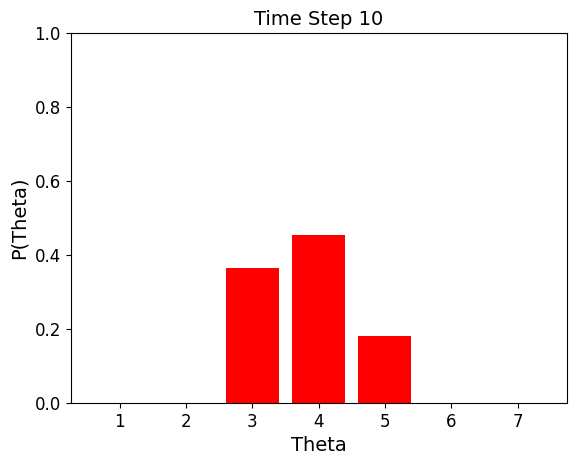

In [104]:
#plot these first 10 steps
chain = np.array(chain)
vals, counts = np.unique(chain, return_counts=True)
visited = np.zeros((7))
visited[vals - 1] = counts

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 10', fontsize = 14)
plt.ylim([0, 1])

plt.savefig("t10.png", bbox_inches='tight')
files.download("t10.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

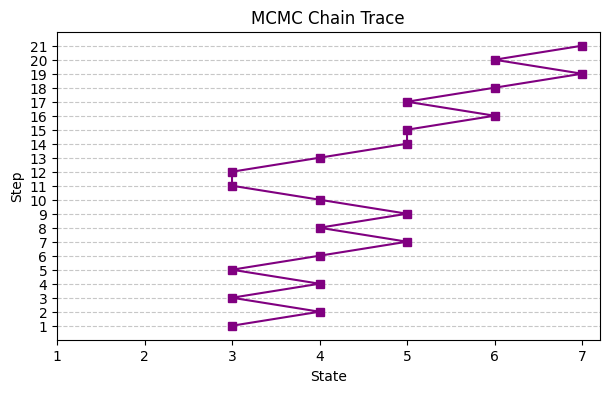

In [105]:
# add 10 more
num_steps = 10
chain = list(chain)
for _ in range(num_steps):
    current = chain[-1]
    proposal = current + np.random.choice([-1, 1])
    if proposal < 1 or proposal > 7:
        proposal = current
    accept_prob = min(1, p[proposal - 1] / p[current - 1])
    if np.random.rand() < accept_prob:
        chain.append(proposal)
    else:
        chain.append(current)

# Plotting
plt.figure(figsize=(7, 4))
# Plot step number nonlinearly scaled
y_positions = np.arange(1, len(chain) + 1)
plt.plot(chain, y_positions, color='purple', marker='s')

plt.xlabel('State')
plt.ylabel('Step')
plt.title('MCMC Chain Trace')
plt.yticks(y_positions)
plt.xticks(states)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("chain20.png", bbox_inches='tight')
files.download("chain20.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

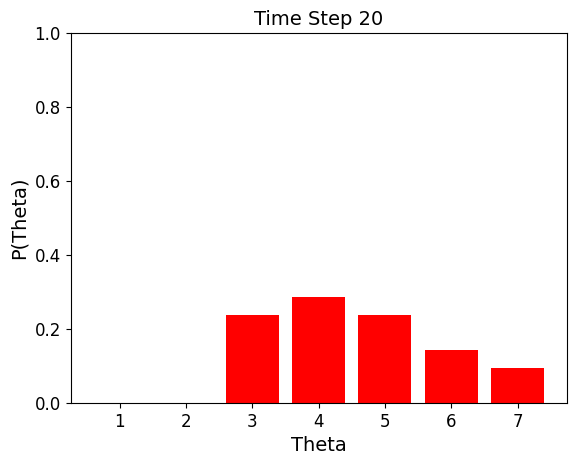

In [106]:
#plot these first 20 steps
chain = np.array(chain)
vals, counts = np.unique(chain, return_counts=True)
visited = np.zeros((7))
visited[vals - 1] = counts

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 20', fontsize = 14)
plt.ylim([0, 1])

plt.savefig("t20.png", bbox_inches='tight')
files.download("t20.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

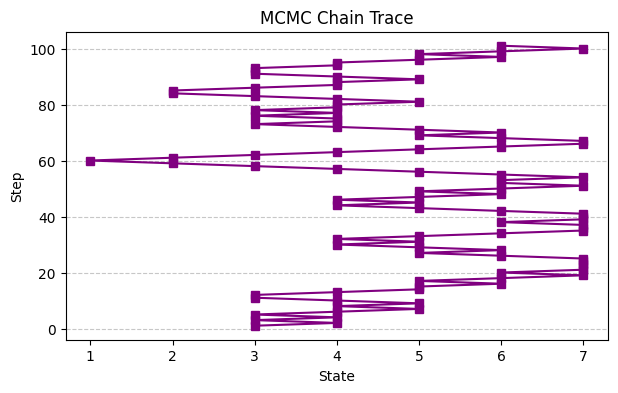

In [107]:
# add 80 more
num_steps = 80
chain = list(chain)
for _ in range(num_steps):
    current = chain[-1]
    proposal = current + np.random.choice([-1, 1])
    if proposal < 1 or proposal > 7:
        proposal = current
    accept_prob = min(1, p[proposal - 1] / p[current - 1])
    if np.random.rand() < accept_prob:
        chain.append(proposal)
    else:
        chain.append(current)

# Plotting
plt.figure(figsize=(7, 4))
# Plot step number nonlinearly scaled
y_positions = np.arange(1, len(chain) + 1)
plt.plot(chain, y_positions, color='purple', marker='s')

plt.xlabel('State')
plt.ylabel('Step')
plt.title('MCMC Chain Trace')
plt.yticks()
plt.xticks(states)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("chain100.png", bbox_inches='tight')
files.download("chain100.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

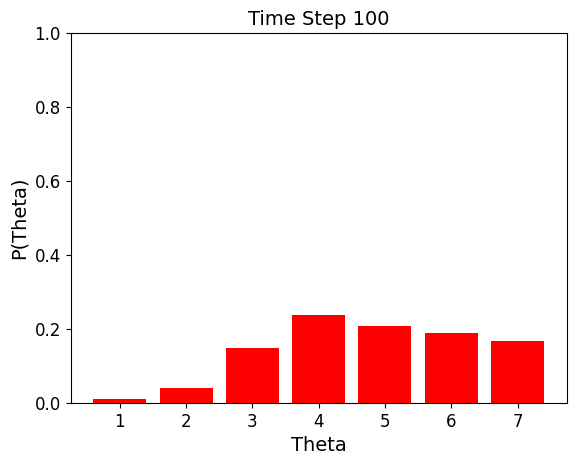

In [108]:
#plot these first 100 steps
chain = np.array(chain)
vals, counts = np.unique(chain, return_counts=True)
visited = np.zeros((7))
visited[vals - 1] = counts

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 100', fontsize = 14)
plt.ylim([0, 1])

plt.savefig("t100.png", bbox_inches='tight')
files.download("t100.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

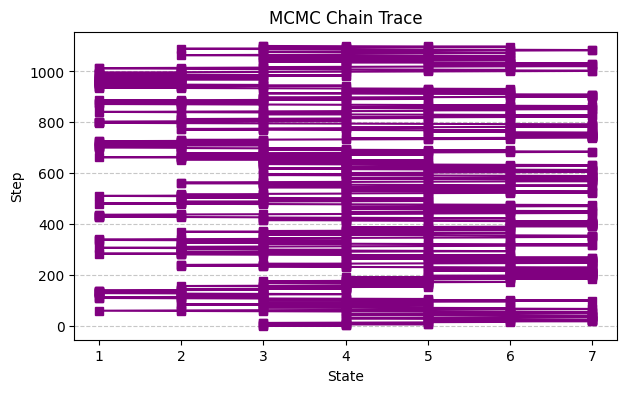

In [109]:
# add 1000 more
num_steps = 1000
chain = list(chain)
for _ in range(num_steps):
    current = chain[-1]
    proposal = current + np.random.choice([-1, 1])
    if proposal < 1 or proposal > 7:
        proposal = current
    accept_prob = min(1, p[proposal - 1] / p[current - 1])
    if np.random.rand() < accept_prob:
        chain.append(proposal)
    else:
        chain.append(current)

# Plotting
plt.figure(figsize=(7, 4))
# Plot step number nonlinearly scaled
y_positions = np.arange(1, len(chain) + 1)
plt.plot(chain, y_positions, color='purple', marker='s')

plt.xlabel('State')
plt.ylabel('Step')
plt.title('MCMC Chain Trace')
plt.yticks()
plt.xticks(states)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("chain1000.png", bbox_inches='tight')
files.download("chain1000.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

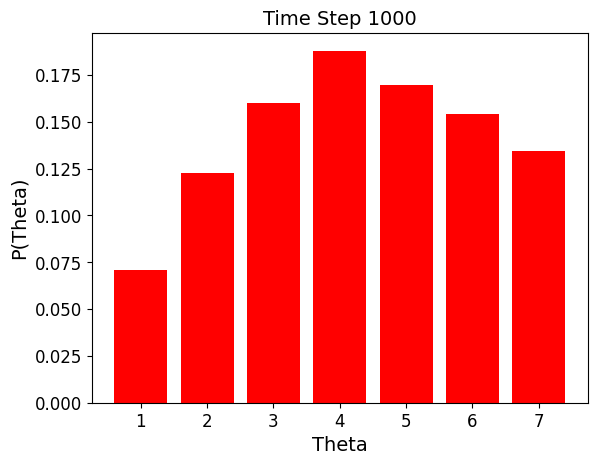

In [110]:
#plot 1000
chain = np.array(chain)
vals, counts = np.unique(chain, return_counts=True)
visited = np.zeros((7))
visited[vals - 1] = counts

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 1000', fontsize = 14)

plt.savefig("t1000.png", bbox_inches='tight')
files.download("t1000.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

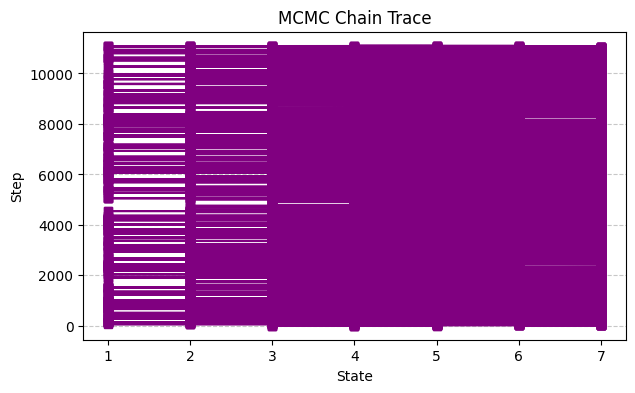

In [111]:
# add 10000 more
num_steps = 10000
chain = list(chain)
for _ in range(num_steps):
    current = chain[-1]
    proposal = current + np.random.choice([-1, 1])
    if proposal < 1 or proposal > 7:
        proposal = current
    accept_prob = min(1, p[proposal - 1] / p[current - 1])
    if np.random.rand() < accept_prob:
        chain.append(proposal)
    else:
        chain.append(current)

# Plotting
plt.figure(figsize=(7, 4))
# Plot step number nonlinearly scaled
y_positions = np.arange(1, len(chain) + 1)
plt.plot(chain, y_positions, color='purple', marker='s')

plt.xlabel('State')
plt.ylabel('Step')
plt.title('MCMC Chain Trace')
plt.yticks()
plt.xticks(states)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("chain1000.png", bbox_inches='tight')
files.download("chain1000.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

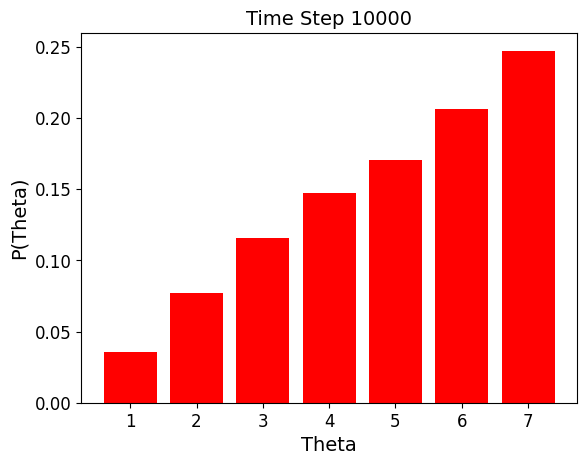

In [112]:
#plot 10000
chain = np.array(chain)
vals, counts = np.unique(chain, return_counts=True)
visited = np.zeros((7))
visited[vals - 1] = counts

plt.bar(states, visited/np.sum(visited), color='red')
plt.xticks(states, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Theta', fontsize = 14)
plt.ylabel('P(Theta)', fontsize = 14)
plt.title('Time Step 10000', fontsize = 14)

plt.savefig("t10000.png", bbox_inches='tight')
files.download("t10000.png")

### **Diagnostics**

In [4]:
#create data
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = pz.Binomial(n=1, p=theta_real).rvs(trials)

In [27]:
#defining two models
coords = {"data": np.arange(len(data))}

with pm.Model(coords=coords) as model_1:
    thet = pm.Uniform('thet', lower=0, upper=1)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata1 = pm.sample(1000, chains = 4)

with pm.Model(coords=coords) as model_2:
    thet = pm.Uniform('thet', lower=-1, upper=2)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata2 = pm.sample(1000, chains = 4)

with pm.Model(coords=coords) as model_3:
    thet = pm.Uniform('thet', lower=-0.1, upper=1)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata3 = pm.sample(1000, chains = 4)

Output()

Trace Plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

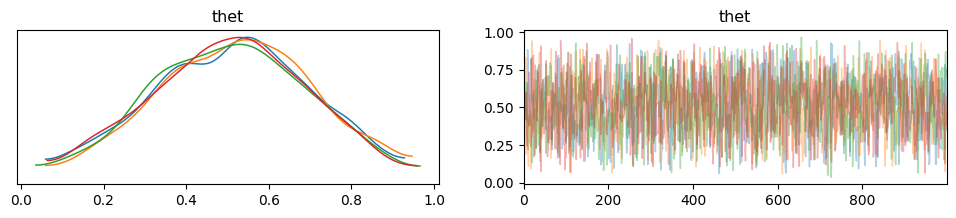

In [28]:
az.plot_trace(idata1, divergences='top', compact = False)

plt.savefig("trace1.png", bbox_inches='tight')
files.download("trace1.png")

az.plot_trace(idata3, divergences='top', compact = False)

plt.savefig("trace2.png", bbox_inches='tight')
files.download("trace2.png")

Rank Plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

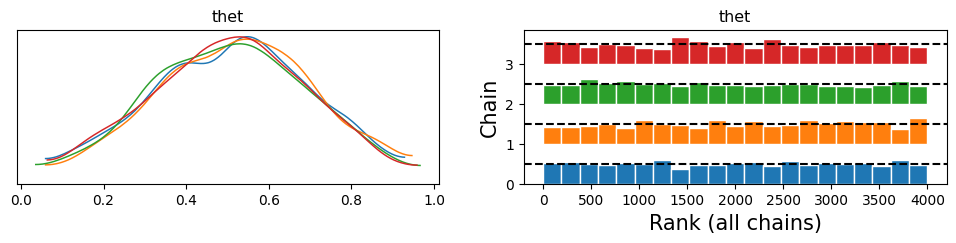

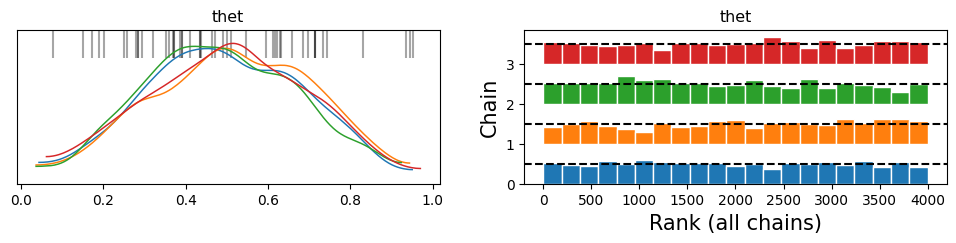

In [29]:
az.plot_trace(idata1, divergences='top', compact = False, kind = 'rank_bars')

plt.savefig("rank1.png", bbox_inches='tight')
files.download("rank1.png")

az.plot_trace(idata3, divergences='top', compact = False, kind = 'rank_bars')

plt.savefig("rank2.png", bbox_inches='tight')
files.download("rank2.png")

Rhat, ESS, MCSE

In [32]:
az.summary(idata1,  kind='diagnostics')
az.summary(idata3,  kind='diagnostics')



,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
thet,0.004,0.002,2030.0,2575.0,1.0


Divergence

In [34]:
#adjust target accept
with pm.Model(coords=coords) as model_3:
    thet = pm.Uniform('thet', lower=-0.1, upper=1)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata3 = pm.sample(1000, chains = 4, target_accept = 0.9)

Output()

ERROR:pymc.stats.convergence:There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


In [35]:
with pm.Model(coords=coords) as model_3:
    thet = pm.Uniform('thet', lower=-0.1, upper=1)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata3 = pm.sample(1000, chains = 4, target_accept = 0.99)

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

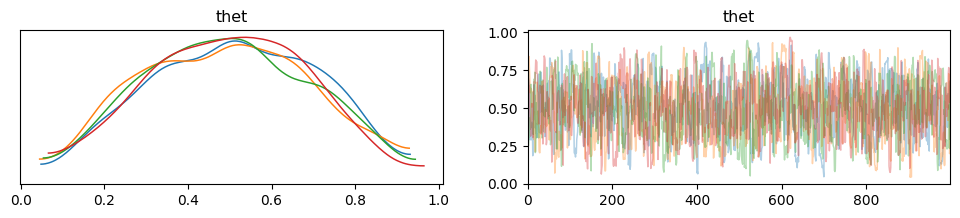

In [36]:
az.plot_trace(idata3, divergences='top', compact = False)

plt.savefig("trace4.png", bbox_inches='tight')
files.download("trace4.png")

From here - in lecture

In [2]:
#defining two models
#centered (less good)
coords = {"data": np.arange(10)}
with pm.Model(coords=coords) as model_cm:
    a = pm.HalfNormal('a', 10)
    b = pm.Normal('b', 0, a, dims='data')
    idata_cm = pm.sample(1000, chains = 4)


#not centered (better)
with pm.Model(coords=coords) as model_ncm:
    a = pm.HalfNormal('a', 10)

    b_offset = pm.Normal('b_offset', mu=0, sigma=1, dims='data')
    b = pm.Deterministic('b', 0 + b_offset * a, dims='data')
    idata_ncm = pm.sample(1000, chains = 4)

Output()

ERROR:pymc.stats.convergence:There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


Trace plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

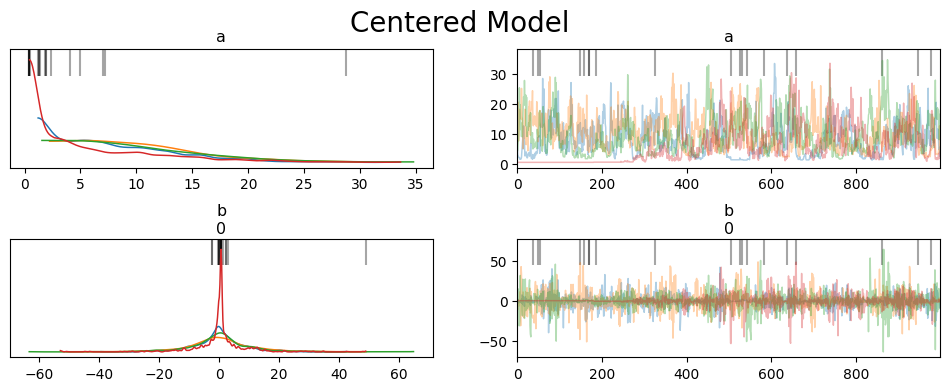

In [13]:
#centered
ax = az.plot_trace(idata_cm, coords={'data': [0]}, divergences='top', compact=False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

ax[0, 0].get_figure().suptitle('Centered Model', fontsize=20)

plt.savefig("tracec.png", bbox_inches='tight')
files.download("tracec.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

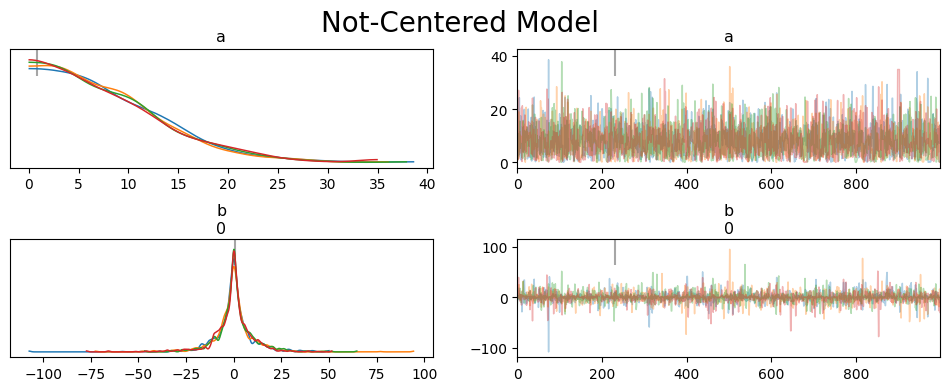

In [15]:
#not centered
ax = az.plot_trace(idata_ncm, var_names=['a', "b"], coords={'data': [0]}, divergences='top', compact=False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

ax[0, 0].get_figure().suptitle('Not-Centered Model', fontsize=20)

plt.savefig("tracenc.png", bbox_inches='tight')
files.download("tracenc.png")

Rank plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

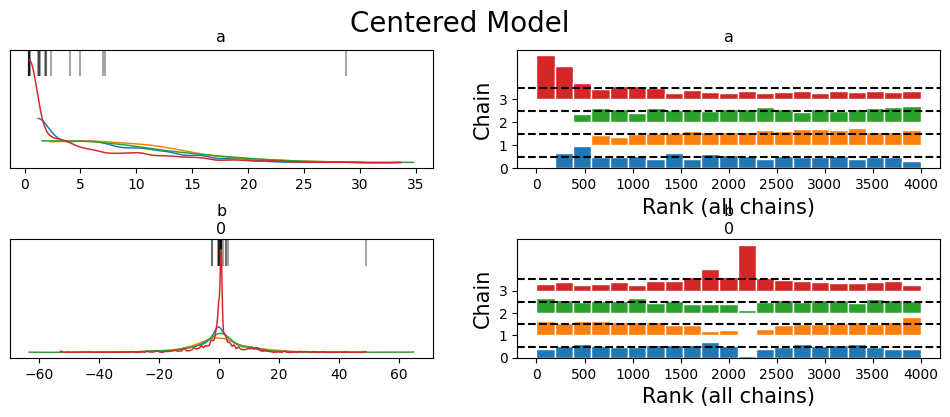

In [17]:
#centered
ax = az.plot_trace(idata_cm, coords={'data': [0]}, divergences='top', compact=False, kind = 'rank_bars')
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

ax[0, 0].get_figure().suptitle('Centered Model', fontsize=20)

plt.savefig("rankc.png", bbox_inches='tight')
files.download("rankc.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

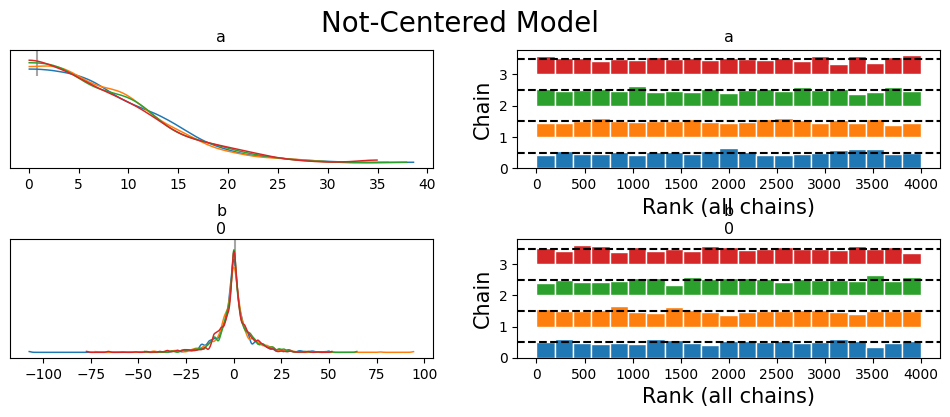

In [19]:
#not centered
ax = az.plot_trace(idata_ncm,  var_names=['a', "b"], coords={'data': [0]}, divergences='top', compact=False, kind = 'rank_bars')
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

ax[0, 0].get_figure().suptitle('Not-Centered Model', fontsize=20)

plt.savefig("ranknc.png", bbox_inches='tight')
files.download("ranknc.png")

Rhat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

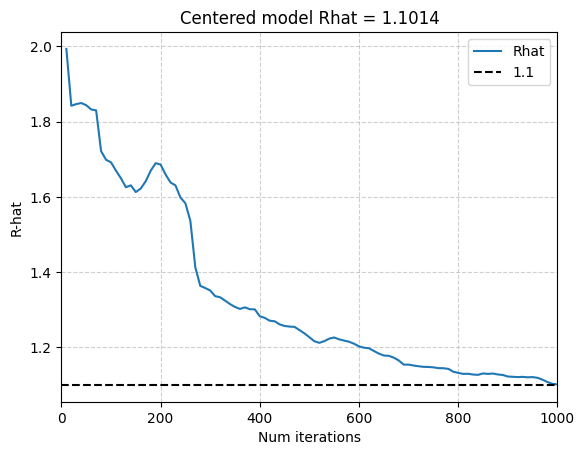

In [34]:
#centered
num_draws = idata_cm.posterior.sizes['draw']

step = 10  # Compute every 100 draws (adjustable)
rhat_values = []
iterations = []

# Loop through increasing number of draws
for i in range(step, num_draws + 1, step):
    partial = idata_cm.sel(draw=slice(0, i))  # Select first i draws
    rhat = az.rhat(partial)
    # Option: Average R-hat over all variables
    rhat_mean = rhat.b[0].mean().values
    rhat_values.append(rhat_mean)
    iterations.append(i)

# Plot
rhat = az.rhat(idata_cm).b[0].mean().values

plt.plot(iterations, rhat_values, label = 'Rhat')
plt.plot([0, 1000], [1.1, 1.1], 'black', linestyle = '--', label = '1.1')
plt.xlabel("Num iterations")
plt.ylabel("R-hat")

#plt.title(f"Centered model Rhat = {np.round(rhat, 4)}")
plt.title("Centered model")

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([0, 1000])
plt.legend(loc = 'upper right')


plt.savefig("rhatc.png", bbox_inches='tight')
files.download("rhatc.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

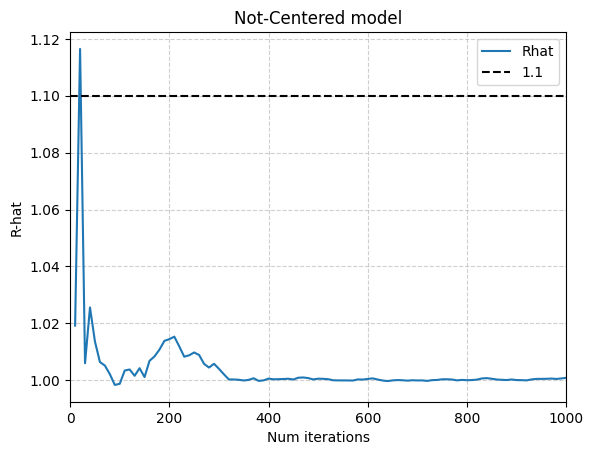

In [35]:
#not centered
num_draws = idata_ncm.posterior.sizes['draw']

step = 10  # Compute every 100 draws (adjustable)
rhat_values = []
iterations = []

# Loop through increasing number of draws
for i in range(step, num_draws + 1, step):
    partial = idata_ncm.sel(draw=slice(0, i))  # Select first i draws
    rhat = az.rhat(partial)
    # Option: Average R-hat over all variables
    rhat_mean = rhat.b[0].mean().values
    rhat_values.append(rhat_mean)
    iterations.append(i)

# Plot
plt.plot(iterations, rhat_values, label = 'Rhat')
plt.plot([0, 1000], [1.1, 1.1], 'black', linestyle = '--', label = '1.1')
plt.xlabel("Num iterations")
plt.ylabel("R-hat")

#plt.title(f"Centered model Rhat = {np.round(rhat, 4)}")
plt.title("Not-Centered model")

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([0, 1000])
plt.legend(loc = 'upper right')


plt.savefig("rhatnc.png", bbox_inches='tight')
files.download("rhatnc.png")

Autocorrelation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

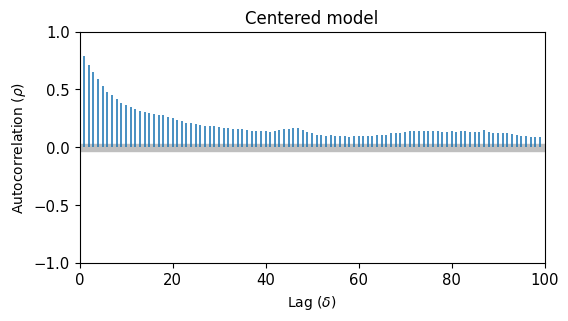

In [37]:
#centered
az.plot_autocorr(idata_cm, var_names=['a'], combined=True, figsize=(6, 3))
plt.title('Centered model')
plt.xlabel('Lag ($\\delta$)')
plt.ylabel('Autocorrelation ($\\rho$)')

plt.savefig("corc.png", bbox_inches='tight')
files.download("corc.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

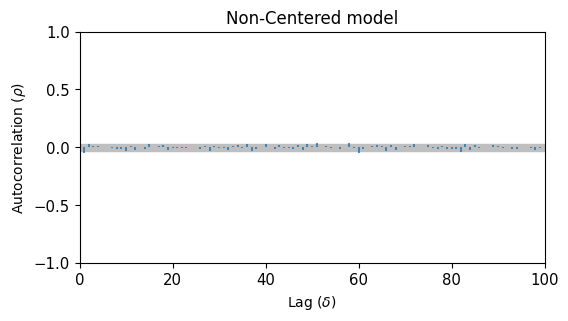

In [38]:
#not centered
az.plot_autocorr(idata_ncm, var_names=['a'], combined=True, figsize=(6, 3))
plt.title('Non-Centered model')
plt.xlabel('Lag ($\\delta$)')
plt.ylabel('Autocorrelation ($\\rho$)')

plt.savefig("cornc.png", bbox_inches='tight')
files.download("cornc.png")

Effective Sample Size

In [39]:
az.summary(idata_cm, coords={'data': [0]}, kind='diagnostics')


,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.092,0.188,16.0,9.0,1.19
b[0],0.150,0.601,5426.0,1093.0,1.10


In [40]:
az.summary(idata_ncm, coords={'data': [0]}, kind='diagnostics')


,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.094,0.122,2925.0,1806.0,1.0
b[0],0.168,0.331,4277.0,3515.0,1.0
b_offset[0],0.015,0.017,4293.0,2573.0,1.0


Divergence

In [33]:
idata1.posterior["log(a)"] = np.log(idata1.posterior["a"])

_, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))

az.plot_pair(
    idata1,
    var_names=["b", "log(a)"],
    coords={"data": [0]},
    divergences=True,
    scatter_kwargs={"color": "cyan"},
    divergences_kwargs={"color": "k", "marker": ".", "mec": None},
    ax=axes[0],
)
axes[0].set_title("model_1")

idata_ncm.posterior["log(a)"] = np.log(idata_ncm.posterior["a"])

az.plot_pair(
    idata_ncm,
    var_names=["b", "log(a)"],
    coords={"data": [0]},
    divergences=True,
    scatter_kwargs={"color": "cyan"},
    divergences_kwargs={"color": "k", "marker": ".", "mec": None},
    ax=axes[1],
)
axes[1].set_title("model_nc")

az.plot_pair(
    idata_ncm,
    var_names=["b_offset", "log(a)"],
    coords={"data": [0]},
    divergences=True,
    scatter_kwargs={"color": "cyan"},
    divergences_kwargs={"color": "k", "marker": ".", "mec": None},
    ax=axes[2],
)
axes[2].set_title("model_nc")


plt.savefig("div.png", bbox_inches='tight')
files.download("div.png")

KeyError: "No variable named 'a'. Variables on the dataset include ['chain', 'draw', 'thet']"